**라이브러리 실행 및 데이터 불러오기**

In [ ]:
# 라이브러리 실행
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 데이터 불러오기
# df = pd.read_csv('/content/drive/MyDrive/sparta/data/breast_cancer.csv')
df = pd.read_csv("/content/sample_data/breast_cancer.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5


**필수 1. 기초 통계**

---



- Breast Cancer 데이터셋의 종양 특성들을 카테고리별로 **진단 결과(diagnosis)**에 따라 분석해보세요.
    
    각 카테고리에 속한 특성들의 **평균과 중앙값**을 구하고 해석해주세요.
    
    1. **크기/형태 관련 특성의 기초통계**
        - radius_mean, perimeter_mean, area_mean에 대한 진단별 평균과 중앙값을 구하세요.
    2. **표면 특성의 기초통계**
        - texture_mean, smoothness_mean에 대한 진단별 평균과 중앙값을 구하세요.
    3. **형태 복잡도 특성의 기초통계**
        - compactness_mean, concavity_mean, concave points_mean에 대한 진단별 평균과 중앙값을 구하세요.
    4. **구조적 특성의 기초통계**
        - symmetry_mean, fractal_dimension_mean에 대한 진단별 평균과 중앙값을 구하세요.
- **유의 사항**
    - 결과는 **소수점 둘째자리**까지 표현해주세요.
    - 각 카테고리별로 **간단한 해석**을 덧붙여주세요.



In [ ]:
# 필수 1. 기초 통계

def get_category_stats(df, features):
    results = []
    for feature in features:
        # 진단별 평균 계산
        means = df.groupby('diagnosis')[feature].mean().round(2)
        # 진단별 중앙값 계산
        medians = df.groupby('diagnosis')[feature].median().round(2)

        results.append({
            'feature': feature,
            'B_mean': means['B'],
            'B_median': medians['B'],
            'M_mean': means['M'],
            'M_median': medians['M'],
            'diff_mean': (means['M'] - means['B']).round(2)
        })

    return pd.DataFrame(results)

# 카테고리별 특성 정의
size_shape = ['radius_mean', 'perimeter_mean', 'area_mean']
surface = ['texture_mean', 'smoothness_mean']
morphological = ['compactness_mean', 'concavity_mean', 'concave points_mean']
structural = ['symmetry_mean', 'fractal_dimension_mean']

# 각 카테고리별 분석 수행 및 결과 출력
print("1. 크기/형태 관련 특성 통계량")
print("-" * 50)
size_results = get_category_stats(df, size_shape)
print("\n양성(B) 종양:")
for _, row in size_results.iterrows():
    print(f"* {row['feature']}:")
    print(f"  평균: {row['B_mean']}, 중앙값: {row['B_median']}")

print("\n악성(M) 종양:")
for _, row in size_results.iterrows():
    print(f"* {row['feature']}:")
    print(f"  평균: {row['M_mean']}, 중앙값: {row['M_median']}")

print("\n2. 표면 특성 통계량")
print("-" * 50)
surface_results = get_category_stats(df, surface)
print("\n양성(B) 종양:")
for _, row in surface_results.iterrows():
    print(f"* {row['feature']}:")
    print(f"  평균: {row['B_mean']}, 중앙값: {row['B_median']}")

print("\n악성(M) 종양:")
for _, row in surface_results.iterrows():
    print(f"* {row['feature']}:")
    print(f"  평균: {row['M_mean']}, 중앙값: {row['M_median']}")

print("\n3. 형태 복잡도 특성 통계량")
print("-" * 50)
morphological_results = get_category_stats(df, morphological)
print("\n양성(B) 종양:")
for _, row in morphological_results.iterrows():
    print(f"* {row['feature']}:")
    print(f"  평균: {row['B_mean']}, 중앙값: {row['B_median']}")

print("\n악성(M) 종양:")
for _, row in morphological_results.iterrows():
    print(f"* {row['feature']}:")
    print(f"  평균: {row['M_mean']}, 중앙값: {row['M_median']}")

print("\n4. 구조적 특성 통계량")
print("-" * 50)
structural_results = get_category_stats(df, structural)
print("\n양성(B) 종양:")
for _, row in structural_results.iterrows():
    print(f"* {row['feature']}:")
    print(f"  평균: {row['B_mean']}, 중앙값: {row['B_median']}")

print("\n악성(M) 종양:")
for _, row in structural_results.iterrows():
    print(f"* {row['feature']}:")
    print(f"  평균: {row['M_mean']}, 중앙값: {row['M_median']}")

1. 크기/형태 관련 특성 통계량
--------------------------------------------------

양성(B) 종양:
* radius_mean:
  평균: 12.15, 중앙값: 12.2
* perimeter_mean:
  평균: 78.08, 중앙값: 78.18
* area_mean:
  평균: 462.79, 중앙값: 458.4

악성(M) 종양:
* radius_mean:
  평균: 17.46, 중앙값: 17.33
* perimeter_mean:
  평균: 115.37, 중앙값: 114.2
* area_mean:
  평균: 978.38, 중앙값: 932.0

2. 표면 특성 통계량
--------------------------------------------------

양성(B) 종양:
* texture_mean:
  평균: 17.91, 중앙값: 17.39
* smoothness_mean:
  평균: 0.09, 중앙값: 0.09

악성(M) 종양:
* texture_mean:
  평균: 21.6, 중앙값: 21.46
* smoothness_mean:
  평균: 0.1, 중앙값: 0.1

3. 형태 복잡도 특성 통계량
--------------------------------------------------

양성(B) 종양:
* compactness_mean:
  평균: 0.08, 중앙값: 0.08
* concavity_mean:
  평균: 0.05, 중앙값: 0.04
* concave points_mean:
  평균: 0.03, 중앙값: 0.02

악성(M) 종양:
* compactness_mean:
  평균: 0.15, 중앙값: 0.13
* concavity_mean:
  평균: 0.16, 중앙값: 0.15
* concave points_mean:
  평균: 0.09, 중앙값: 0.09

4. 구조적 특성 통계량
--------------------------------------------------

양성(B) 종양:
* 

**필수 1 답안**
1. 크기/형태 관련 특성 통계량 :
    - 양성(B) 종양 :
        - radius_mean: 평균 12.15, 중앙값 12.20
        - perimeter_mean: 평균 78.08, 중앙값 78.18
        - area_mean: 평균 462.79, 중앙값 458.40
    - 악성(M) 종양 :
        - radius_mean: 평균 17.46, 중앙값 17.33
        - perimeter_mean: 평균 115.37, 중앙값 114.20
        - area_mean: 평균 978.38, 중앙값 932.00
    - 해석 :
        - 크기/형태 관련 모든 특성에서 악성 종양이 양성 종양보다 확연히 큰 값을 보입니다. 특히 area_mean의 경우 악성 종양(978.38)이 양성 종양(462.79)보다 2배 이상 큽니다. 각 특성에서 평균과 중앙값이 비슷한 값을 보이는 것으로 보아 데이터가 대체로 정규분포를 따르는 것으로 판단됩니다.


2. 표면 관련 특성 통계량 :
    - 양성(B) 종양 :
        - texture_mean: 평균 17.91, 중앙값 17.39
        - smoothness_mean: 평균 0.09, 중앙값 0.09
    - 악성(M) 종양 :
        - texture_mean: 평균 21.60, 중앙값 21.46
        - smoothness_mean: 평균 0.10, 중앙값 0.10
    - 해석 :
        - 표면 특성에서도 악성 종양이 더 큰 값을 보이지만, 그 차이는 크기/형태 특성에 비해 상대적으로 작습니다. texture_mean의 경우 약 3.69 정도의 차이를 보이며, smoothness_mean은 매우 작은 차이(0.01)를 보입니다.


3. 형태 복잡도 관련 특성 통계량 :
    - 양성(B) 종양 :
        - compactness_mean: 평균 0.08, 중앙값 0.08
        - concavity_mean: 평균 0.05, 중앙값 0.04
        - concave points_mean: 평균 0.03, 중앙값 0.02
    - 악성(M) 종양 :
        - compactness_mean: 평균 0.15, 중앙값 0.13
        - concavity_mean: 평균 0.16, 중앙값 0.15
        - concave points_mean: 평균 0.09, 중앙값 0.09
    - 해석 :
        - 형태 복잡도 특성들에서는 모두 악성 종양이 양성 종양보다 2-3배 정도 큰 값을 보입니다. 특히 concavity_mean에서 가장 큰 차이(0.11)를 보이며, 이는 악성 종양이 더 복잡한 형태를 가지고 있음을 시사합니다.


4. 구조적 관련 특성 통계량 :
    - 양성(B) 종양 :
        - symmetry_mean: 평균 0.17, 중앙값 0.17
        - fractal_dimension_mean: 평균 0.06, 중앙값 0.06
    - 악성(M) 종양 :
        - symmetry_mean: 평균 0.19, 중앙값 0.19
        - fractal_dimension_mean: 평균 0.06, 중앙값 0.06
    - 해석 :
        - 구조적 특성에서는 다른 카테고리들에 비해 매우 작은 차이를 보입니다. symmetry_mean은 약 0.02의 작은 차이를 보이며, fractal_dimension_mean은 거의 차이가 없습니다. 이는 종양의 구조적 특성이 악성 여부 판단에 상대적으로 덜 중요할 수 있음을 시사합니다.




**필수 2. 통계적 가설검정 1**


---



- Breast Cancer 데이터셋의 종양 특성들을 카테고리별로 분석하려 합니다. 각 카테고리에 속한 특성들에 대해 **diagnosis(양성/악성)에 따른 독립표본 T-TEST**를 진행해주세요.
    - **크기/형태 관련 특성의 분석**
    - radius_mean, perimeter_mean, area_mean에 대한 t-test를 수행하세요.
    - **표면 특성의 분석**
    - texture_mean, smoothness_mean에 대한 t-test를 수행하세요.
    - **형태 복잡도 특성의 분석**
    - compactness_mean, concavity_mean, concave points_mean에 대한 t-test를 수행하세요.
    - **구조적 특성의 분석**
    - symmetry_mean, fractal_dimension_mean에 대한 t-test를 수행하세요.
- **가설검정 방법**은 각 카테고리별로:
    - **귀무가설과 대립가설**을 작성하세요.
    - **t-score와 p-value**를 구하세요.
    - **귀무가설의 채택/기각 여부**를 판단하세요.
    - 해당 카테고리 내에서 **어떤 특성이 악성 종양 판별에** **가장 큰 영향을** 미치는지 분석하세요.

In [ ]:
# 필수 2. 통계적 가설검정 1

def perform_ttest_by_category(df, features):
   results = []
   for feature in features:
       # 양성과 악성 그룹 나누기
       benign = df[df['diagnosis'] == 'B'][feature]
       malignant = df[df['diagnosis'] == 'M'][feature]

       # T-test 수행
       t_stat, p_value = stats.ttest_ind(benign, malignant)

       # 평균값 계산
       mean_diff = malignant.mean() - benign.mean()

       results.append({
           'feature': feature,
           't_score': t_stat,
           'p_value': p_value,
           'mean_benign': benign.mean(),
           'mean_malignant': malignant.mean(),
           'mean_difference': mean_diff
       })

   return pd.DataFrame(results)

# 카테고리별 특성 정의
size_shape = ['radius_mean', 'perimeter_mean', 'area_mean']
surface = ['texture_mean', 'smoothness_mean']
morphological = ['compactness_mean', 'concavity_mean', 'concave points_mean']
structural = ['symmetry_mean', 'fractal_dimension_mean']

# 각 카테고리별 분석 수행 및 결과 출력
print("1. 크기/형태 관련 특성 분석")
print("-" * 50)
size_results = perform_ttest_by_category(df, size_shape)
print("\n크기/형태 특성 T-test 결과:")
print(size_results.round(4))

print("\n2. 표면 특성 분석")
print("-" * 50)
surface_results = perform_ttest_by_category(df, surface)
print("\n표면 특성 T-test 결과:")
print(surface_results.round(4))

print("\n3. 형태 복잡도 특성 분석")
print("-" * 50)
morphological_results = perform_ttest_by_category(df, morphological)
print("\n형태 복잡도 특성 T-test 결과:")
print(morphological_results.round(4))

print("\n4. 구조적 특성 분석")
print("-" * 50)
structural_results = perform_ttest_by_category(df, structural)
print("\n구조적 특성 T-test 결과:")
print(structural_results.round(4))

# 종합 분석: 각 카테고리에서 가장 영향력 있는 특성 찾기
def get_most_significant_feature(results):
   return results.loc[results['t_score'].abs().idxmax()]

print("\n\n종합 분석")
print("=" * 50)
print("\n각 카테고리별 가장 영향력 있는 특성:")
categories = {
   '크기/형태': size_results,
   '표면': surface_results,
   '형태 복잡도': morphological_results,
   '구조적': structural_results
}

for category_name, results in categories.items():
   most_sig = get_most_significant_feature(results)
   print(f"\n{category_name} 카테고리:")
   print(f"- 가장 영향력 있는 특성: {most_sig['feature']}")
   print(f"- t-score: {most_sig['t_score']:.4f}")
   print(f"- p-value: {most_sig['p_value']:.4f}")
   print(f"- 평균 차이: {most_sig['mean_difference']:.4f}")

1. 크기/형태 관련 특성 분석
--------------------------------------------------

크기/형태 특성 T-test 결과:
          feature  t_score  p_value  mean_benign  mean_malignant  \
0     radius_mean -25.4358      0.0      12.1465         17.4628   
1  perimeter_mean -26.4052      0.0      78.0754        115.3654   
2       area_mean -23.9387      0.0     462.7902        978.3764   

   mean_difference  
0           5.3163  
1          37.2900  
2         515.5862  

2. 표면 특성 분석
--------------------------------------------------

표면 특성 T-test 결과:
           feature  t_score  p_value  mean_benign  mean_malignant  \
0     texture_mean -10.8672      0.0      17.9148         21.6049   
1  smoothness_mean  -9.1461      0.0       0.0925          0.1029   

   mean_difference  
0           3.6901  
1           0.0104  

3. 형태 복잡도 특성 분석
--------------------------------------------------

형태 복잡도 특성 T-test 결과:
               feature  t_score  p_value  mean_benign  mean_malignant  \
0     compactness_mean -17.6984      

**필수 2 답안**


1. 크기/형태 관련 특성 분석 :
    - 가설 :
        - H0: 양성과 악성 종양의 크기/형태 관련 특성 평균은 동일하다
        - H1: 양성과 악성 종양의 크기/형태 관련 특성 평균은 다르다
    - 검정 결과 :
        - radius_mean: t-score -25.44, p-value 0.000
        - perimeter_mean: t-score -26.41, p-value 0.000
        - area_mean: t-score -23.94, p-value 0.000
    - 해석 :
        - 모든 크기/형태 특성에서 p-value가 0.05보다 매우 작아 귀무가설을 기각합니다.
        - perimeter_mean이 가장 높은 t-score 절댓값(-26.41)을 보여, 가장 강력한 차이를 나타냅니다.
        - 평균 차이를 보면 area_mean이 515.59로 가장 큰 절대적 차이를 보입니다.


2. 표면 관련 특성 분석 :
    - 가설 :
        - H0: 양성과 악성 종양의 표면 관련 특성 평균은 동일하다
        - H1: 양성과 악성 종양의 표면 관련 특성 평균은 다르다
    - 검정 결과 :
        - texture_mean: t-score -10.87, p-value 0.000
        - smoothness_mean: t-score -9.15, p-value 0.000
    - 해석 :
        - 두 표면 특성 모두 p-value가 0.05보다 작아 귀무가설을 기각합니다.
        - texture_mean이 더 높은 t-score 절댓값(-10.87)을 보여, 더 유의미한 차이를 나타냅니다.
        - 평균 차이는 texture_mean이 3.69, smoothness_mean이 0.01로 나타났습니다.


3. 형태 복잡도 관련 특성 분석 :
    - 가설 :
        - H0: 양성과 악성 종양의 형태 복잡도 관련 특성 평균은 동일하다
        - H1: 양성과 악성 종양의 형태 복잡도 관련 특성 평균은 다르다
    - 검정 결과 :
        - compactness_mean: t-score -17.70, p-value 0.000
        - concavity_mean: t-score -23.10, p-value 0.000
        - concave points_mean: t-score -29.35, p-value 0.000
    - 해석 :
        - 모든 형태 복잡도 특성에서 p-value가 0.05보다 작아 귀무가설을 기각합니다.
        - concave points_mean이 가장 높은 t-score 절댓값(-29.35)을 보여, 가장 강력한 차이를 나타냅니다.
        - concavity_mean이 평균 차이 0.11로 가장 큰 차이를 보입니다.


4. 구조적 관련 관련 특성 분석 :
    - 가설 :
        - H0: 양성과 악성 종양의 구조적 관련 특성 평균은 동일하다
        - H1: 양성과 악성 종양의 구조적 관련 특성 평균은 다르다
    - 검정 결과 :
        - symmetry_mean: t-score -8.34, p-value 0.000
        - fractal_dimension_mean: t-score 0.31, p-value 0.760
    - 해석 :
        - symmetry_mean은 p-value가 0.05보다 작아 귀무가설을 기각합니다.
        - 반면 fractal_dimension_mean은 p-value가 0.76으로 귀무가설을 기각할 수 없습니다.
        - 구조적 특성은 다른 카테고리에 비해 상대적으로 낮은 t-score를 보입니다.

- 종합 결론:
    - 분석된 모든 카테고리 중 형태 복잡도 특성의 concave points_mean이 가장 큰 t-score(-29.35)를 보여, 종양의 악성 여부를 판단하는데 가장 중요한 지표로 판단됨
    - 크기/형태 관련 특성들도 전반적으로 높은 t-score를 보여 중요한 판단 기준이 될 수 있음
    - 구조적 특성은 상대적으로 낮은 t-score를 보이며, fractal_dimension_mean의 경우 통계적으로 유의미한 차이를 보이지 않아 악성 여부 판단에 적합하지 않은 것으로 판단됨
    - 대부분의 특성에서 악성 종양이 양성 종양보다 큰 값을 보이는 경향이 있음






**필수 3. 통계적 가설검정 2**


---
- Breast Cancer 데이터셋의 종양 특성들을 카테고리별로 분석하려 합니다. 각 카테고리에 속한 특성들의 측정치(mean, se, worst) 간 차이를 **ANOVA**로 분석해주세요.
    - **크기/형태 관련 특성**의 분석
    - radius (mean, se, worst), perimeter (mean, se, worst), area (mean, se, worst)에 대한 측정치 간 차이를 ANOVA로 분석하세요.
    - **표면 특성**의 분석
    - texture (mean, se, worst), smoothness (mean, se, worst)에 대한 측정치 간 차이를 ANOVA로 분석하세요.
    - **형태 복잡도 특성**의 분석
    - compactness (mean, se, worst), concavity (mean, se, worst), - concave points (mean, se, worst)에 대한 측정치 간 차이를 ANOVA로 분석하세요.
    - **구조적 특성**의 분석
    - symmetry (mean, se, worst), fractal dimension (mean, se, worst)에 대한 측정치 간 차이를 ANOVA로 분석하세요.
- **가설검정 방법**은 각 카테고리별로:
    - **귀무가설과 대립가설**을 작성하세요.
    - **t-score와 p-value**를 구하세요.
    - **귀무가설의 채택/기각 여부**를 판단하세요.
    - 해당 카테고리 내에서 **어떤 특성이 악성 종양 판별에** **가장 큰 영향을** 미치는지 분석하세요.


In [ ]:
# 필수 3. 통계적 가설검정 2

def perform_anova_by_category(df, base_features):
   results = []
   for feature in base_features:
       # 세 측정치 추출
       mean_vals = df[f'{feature}_mean']
       se_vals = df[f'{feature}_se']
       worst_vals = df[f'{feature}_worst']

       # ANOVA 수행
       f_stat, p_value = stats.f_oneway(mean_vals, se_vals, worst_vals)

       # 평균값 계산
       results.append({
           'feature': feature,
           'f_statistic': f_stat,
           'p_value': p_value,
           'mean_mean': mean_vals.mean(),
           'mean_se': se_vals.mean(),
           'mean_worst': worst_vals.mean(),
           'max_diff': max(abs(mean_vals.mean() - se_vals.mean()),
                         abs(mean_vals.mean() - worst_vals.mean()),
                         abs(se_vals.mean() - worst_vals.mean()))
       })

   return pd.DataFrame(results)

# 카테고리별 기본 특성 정의
size_shape = ['radius', 'perimeter', 'area']
surface = ['texture', 'smoothness']
morphological = ['compactness', 'concavity', 'concave points']
structural = ['symmetry', 'fractal_dimension']

# 각 카테고리별 분석 수행 및 결과 출력
print("1. 크기/형태 관련 특성 분석")
print("-" * 50)
size_results = perform_anova_by_category(df, size_shape)
print("\n크기/형태 특성 ANOVA 결과:")
print(size_results.round(4))

print("\n2. 표면 특성 분석")
print("-" * 50)
surface_results = perform_anova_by_category(df, surface)
print("\n표면 특성 ANOVA 결과:")
print(surface_results.round(4))

print("\n3. 형태 복잡도 특성 분석")
print("-" * 50)
morphological_results = perform_anova_by_category(df, morphological)
print("\n형태 복잡도 특성 ANOVA 결과:")
print(morphological_results.round(4))

print("\n4. 구조적 특성 분석")
print("-" * 50)
structural_results = perform_anova_by_category(df, structural)
print("\n구조적 특성 ANOVA 결과:")
print(structural_results.round(4))

# 종합 분석: 각 카테고리에서 가장 큰 차이를 보이는 특성 찾기
def get_most_different_feature(results):
   return results.loc[results['f_statistic'].abs().idxmax()]

print("\n\n종합 분석")
print("=" * 50)
print("\n각 카테고리별 가장 큰 측정치 차이를 보이는 특성:")
categories = {
   '크기/형태': size_results,
   '표면': surface_results,
   '형태 복잡도': morphological_results,
   '구조적': structural_results
}

for category_name, results in categories.items():
   most_diff = get_most_different_feature(results)
   print(f"\n{category_name} 카테고리:")
   print(f"- 가장 큰 차이를 보이는 특성: {most_diff['feature']}")
   print(f"- F-statistic: {most_diff['f_statistic']:.4f}")
   print(f"- p-value: {most_diff['p_value']:.4f}")
   print(f"- mean 값: {most_diff['mean_mean']:.4f}")
   print(f"- se 값: {most_diff['mean_se']:.4f}")
   print(f"- worst 값: {most_diff['mean_worst']:.4f}")

1. 크기/형태 관련 특성 분석
--------------------------------------------------

크기/형태 특성 ANOVA 결과:
     feature  f_statistic  p_value  mean_mean  mean_se  mean_worst  max_diff
0     radius    3527.2952      0.0    14.1273   0.4052     16.2692   15.8640
1  perimeter    3147.8686      0.0    91.9690   2.8661    107.2612  104.3952
2       area     717.2073      0.0   654.8891  40.3371    880.5831  840.2460

2. 표면 특성 분석
--------------------------------------------------

표면 특성 ANOVA 결과:
      feature  f_statistic  p_value  mean_mean  mean_se  mean_worst  max_diff
0     texture    4856.0183      0.0    19.2896   1.2169     25.6772   24.4604
1  smoothness    9760.9011      0.0     0.0964   0.0070      0.1324    0.1253

3. 형태 복잡도 특성 분석
--------------------------------------------------

형태 복잡도 특성 ANOVA 결과:
          feature  f_statistic  p_value  mean_mean  mean_se  mean_worst  \
0     compactness     827.4239      0.0     0.1043   0.0255      0.2543   
1       concavity     529.9599      0.0     0.088

**필수 3 답안**
1. 크기/형태 관련 특성 분석 :
    - 가설 :
        - H0: mean, se, worst 값 간의 평균 차이가 없다
        - H1: mean, se, worst 값 간의 평균 차이가 있다
    - 검정 결과 :
        - radius: F-statistic 3527.30, p-value 0.0000
        - perimeter: F-statistic 3147.87, p-value 0.0000
        - area: F-statistic 717.21, p-value 0.0000
    - 해석 :
        - 모든 특성에서 p-value가 0.05보다 작아 귀무가설을 기각합니다.
        - radius가 가장 높은 F-statistic(3527.30)을 보여 가장 유의미한 차이를 나타냅니다.
        - area는 상대적으로 낮은 F-statistic을 보이지만, 절대적 차이(max_diff)는 840.25로 가장 큽니다.


2. 표면 관련 특성 분석 :
    - 가설 :
        - H0: mean, se, worst 값 간의 평균 차이가 없다
        - H1: mean, se, worst 값 간의 평균 차이가 있다
    - 검정 결과 :
        - texture: F-statistic 4856.02, p-value 0.0000
        - smoothness: F-statistic 9760.90, p-value 0.0000
    - 해석 :
        - 두 특성 모두 p-value가 0.05보다 작아 귀무가설을 기각합니다.
        - smoothness가 매우 높은 F-statistic(9760.90)을 보여 가장 강력한 차이를 나타냅니다.
        - texture의 max_diff가 24.46으로 smoothness(0.13)보다 절대적 차이가 큽니다.


3. 형태 복잡도 관련 특성 분석 :
    - 가설 :
        - H0: mean, se, worst 값 간의 평균 차이가 없다
        - H1: mean, se, worst 값 간의 평균 차이가 있다
    - 검정 결과 :
        - compactness: F-statistic 827.42, p-value 0.0000
        - concavity: F-statistic 529.96, p-value 0.0000
        - concave points: F-statistic 788.95, p-value 0.0000
    - 해석 :
        - 모든 특성에서 p-value가 0.05보다 작아 귀무가설을 기각합니다.
        - compactness가 가장 높은 F-statistic(827.42)을 보입니다.
        - concavity가 max_diff 0.24로 가장 큰 절대적 차이를 보입니다.


4. 구조적 관련 특성 분석 :
    - 가설 :
        - H0: mean, se, worst 값 간의 평균 차이가 없다
        - H1: mean, se, worst 값 간의 평균 차이가 있다
    - 검정 결과 :
        - symmetry: F-statistic 6752.70, p-value 0.0000
        - fractal_dimension: F-statistic 7689.02, p-value 0.0000
    - 해석 :
        - 두 특성 모두 p-value가 0.05보다 작아 귀무가설을 기각합니다.
        - fractal_dimension이 더 높은 F-statistic(7689.02)을 보입니다.
        - symmetry가 max_diff 0.27로 더 큰 절대적 차이를 보입니다.

- 종합 결론:
    - 모든 특성에서 세 측정치 간 통계적으로 유의미한 차이가 있음이 확인됨
    - 표면 특성 카테고리의 smoothness가 가장 큰 F-statistic을 보여, 측정치 간 가장 뚜렷한 차이를 보임
    - 대부분의 특성에서 worst > mean > se 순서로 값이 크게 나타남
    - 크기/형태 관련 특성들은 절대적 차이(max_diff)가 크지만, F-statistic 관점에서는 중간 정도의 차이를 보임
    - 이러한 결과는 각 특성의 측정치들이 서로 다른 정보를 제공하고 있으며, 특히 worst 값이 mean, se 값과 상당한 차이를 보여 종양 특성을 파악하는데 중요한 정보를 제공할 수 있음을 시사함

**필수 4. 머신러닝 1**


---
- **아래와 같은 데이터를 바탕으로 선형 회귀 모델을 훈련시키고, 회귀식을 작성해주세요.**
    - 독립 변수(X): radius_mean (평균 반지름)
    - 종속 변수(Y): area_mean (평균 면적)
- **이 두 변수는 직관적으로 서로 관계가 있을 것으로 예상됩니다**
    
    **(반지름이 커지면 면적도 커질 것).회귀 모델을 학습한 후:**
    
    - 결정계수(R²)를 계산해주세요.
    - 회귀식을 작성해주세요.
    - radius_mean이 25일 때의 area_mean을 예측해주세요.
- **유의 사항**
    - 데이터 전처리나 분할은 필요하지 않습니다. 전체 데이터를 사용하여 학습을 진행해주세요.
    - sklearn.linear_model의 LinearRegression을 사용해주세요.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/us

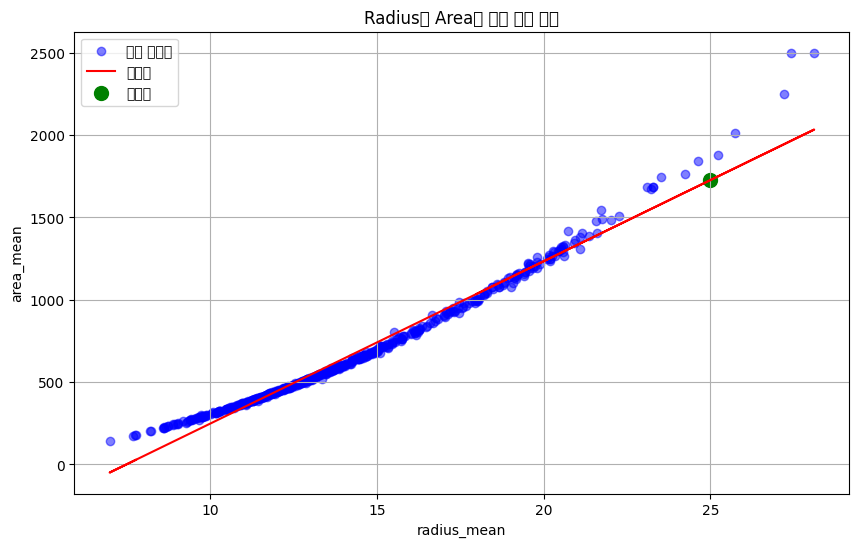

1. 결정계수(R²): 0.9749

2. 회귀식:
area_mean = 98.6 × radius_mean + -738.04

3. 예측 결과:
radius_mean이 25일 때의 예측 area_mean: 1726.92


In [ ]:
# 필수 4. 머신러닝 1

# 독립변수(X)와 종속변수(Y) 준비
X = df['radius_mean'].values.reshape(-1, 1)  # 2D array 형태로 변환
Y = df['area_mean'].values

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, Y)

# 결정계수(R²) 계산
r_squared = model.score(X, Y)

# 회귀식 계수
slope = model.coef_[0]
intercept = model.intercept_

# radius_mean이 25일 때의 예측
new_radius = np.array([[25]])
predicted_area = model.predict(new_radius)[0]

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', alpha=0.5, label='실제 데이터')
plt.plot(X, model.predict(X), color='red', label='회귀선')
plt.scatter(new_radius, predicted_area, color='green', s=100, label='예측값')
plt.xlabel('radius_mean')
plt.ylabel('area_mean')
plt.title('Radius와 Area의 선형 회귀 관계')
plt.legend()
plt.grid(True)
plt.show()

# 결과 출력
print("1. 결정계수(R²):", round(r_squared, 4))
print("\n2. 회귀식:")
print(f"area_mean = {round(slope, 2)} × radius_mean + {round(intercept, 2)}")
print("\n3. 예측 결과:")
print(f"radius_mean이 25일 때의 예측 area_mean: {round(predicted_area, 2)}")

**도전 1. 머신러닝 2**


---
- **과제**
    
    **크기/형태 관련 특성(radius_mean, perimeter_mean, area_mean)을 사용하여 종양의 악성 여부(diagnosis)를 예측하는 RandomForest 모델을 학습시켜주세요.**
    
    학습된 모델을 사용하여 다음 작업을 수행해주세요.
    
    1. 모델의 정확도를 계산해주세요.
    2. Feature Importance를 막대 그래프로 시각화해주세요.
    3. 각 특성의 중요도 수치를 출력하고 해석해주세요.
- **학습 방법**
    - y(종속변수)는 B/M으로 기재된 이진형 데이터이므로, 인코딩 작업이 필요합니다.
        
        구현을 위해 **LabelEncoder**를 사용해주세요.
        
    - 머신러닝 코드 작성 시, 전체 데이터셋을 Train set과 Test set으로 나눠주세요.
        - **Test set 비중 : 30%**
        - **random_state : 42**
    - **RandomForestClassifier**를 활용하여 모델 학습을 진행해주세요.
        - **random_state : 42**


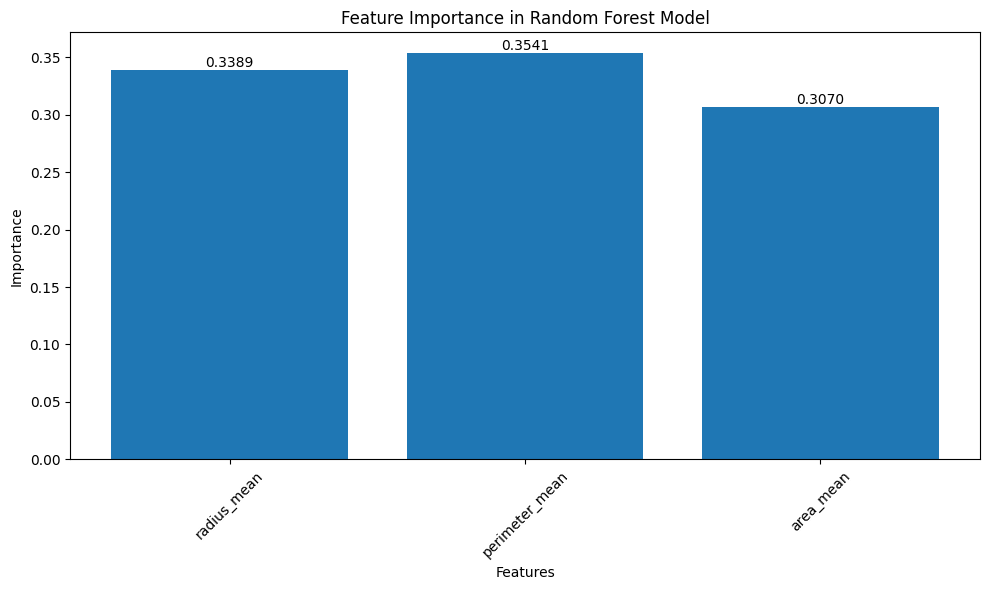

1. 모델 정확도: 91.81 %

3. Feature Importance 수치:
          Feature  Importance
1  perimeter_mean    0.354107
0     radius_mean    0.338884
2       area_mean    0.307009

Feature Importance 해석:
- perimeter_mean가 0.3541로 가장 중요한 특성으로 나타났습니다.
- 이는 종양의 크기/형태 특성 중에서 perimeter_mean가
  악성 여부를 판단하는데 가장 큰 영향을 미친다는 것을 의미합니다.


In [ ]:
#도전 1. 머신러닝 2

# 크기/형태 관련 특성 선택
X = df[['radius_mean', 'perimeter_mean', 'area_mean']]
y = df['diagnosis']

# 레이블 인코딩
le = LabelEncoder()
y = le.fit_transform(y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# RandomForest 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 모델 평가
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Feature Importance 시각화
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
bars = plt.bar(feature_names, importances)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)

# 중요도 값 표시
for bar in bars:
   height = bar.get_height()
   plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}',
            ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 결과 출력
print("1. 모델 정확도:", round(accuracy * 100, 2), "%")

print("\n3. Feature Importance 수치:")
importance_df = pd.DataFrame({
   'Feature': feature_names,
   'Importance': importances
}).sort_values('Importance', ascending=False)

print(importance_df)
print("\nFeature Importance 해석:")
most_important = importance_df.iloc[0]
print(f"- {most_important['Feature']}가 {most_important['Importance']:.4f}로 가장 중요한 특성으로 나타났습니다.")
print(f"- 이는 종양의 크기/형태 특성 중에서 {most_important['Feature']}가")
print("  악성 여부를 판단하는데 가장 큰 영향을 미친다는 것을 의미합니다.")

**도전 1 답안 템플릿**
1. **모델 정확도: __% `코드 출력`**
2. **Feature Importance : 막대 그래프로 시각화 `코드 출력`**
3. **Feature Importance : 해석 `마크다운으로 작성`**

**도전 1 답안**
3. Feature Importance 해석
    - perimeter_mean가 0.3541로 가장 중요한 특성으로 나타났습니다.
    - 이는 종양의 크기/형태 특성 중에서 perimeter_mean가   악성 여부를 판단하는데 가장 큰 영향을 미친다는 것을 의미합니다.

**도전 2. 머신러닝 3**


---
- **과제**
    
    **형태 복잡도 특성(compactness_mean, concavity_mean, concave points_mean)을 사용하여 종양의 악성 여부를 예측하는 로지스틱 회귀 모델을 학습시켜주세요.**
    
    학습된 모델을 사용하여 다음 작업을 수행해주세요.
    
    1. 모델의 정확도를 계산해주세요.
    2. 각 특성의 계수를 막대 그래프로 시각화해주세요.
    3. 아래의 조건에 맞춰, 새로운 종양의 악성 확률을 계산해주세요.
        - compactness_mean : `0.1`
        - concavity_mean : `0.1`
        - concave points_mean : `0.05`
- **학습 및 추론 방법**
    - y(종속변수)는 B/M으로 기재된 이진형 데이터이므로, 인코딩 작업이 필요합니다.
        
        구현을 위해 **LabelEncoder**를 사용해주세요.
        
    - 머신러닝 코드 작성 시, 전체 데이터셋을 Train set과 Test set으로 나눠주세요.
        - **Test set 비중 : 30%**
        - **random_state : 42**
    - **계수** 시각화 코드 작성 시, 각 특성의 계수 크기를 비교할 수 있도록 **막대 그래프**를 생성하세요.
        - 양수/음수를 다른 색상으로 표시해주세요.
    - 새로운 종양 데이터를 **`new_tumor`** 변수에 지정하고, **`model.predict_proba`**를 사용하여 악성 확률을 구해주세요.


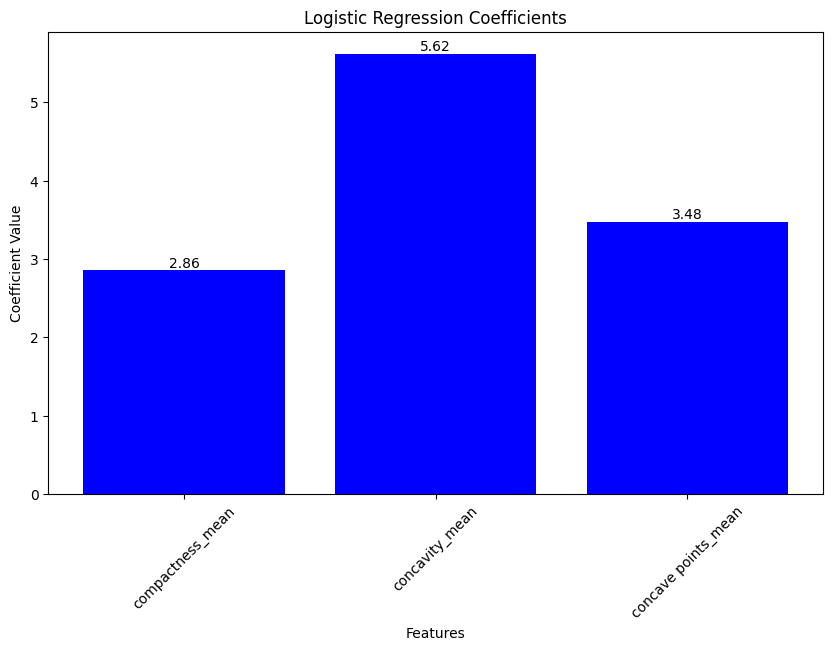

1. 모델 정확도: 82.46 %

3. 새로운 종양의 예측 확률:
양성(B) 확률: 61.81 %
악성(M) 확률: 38.19 %


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
# 도전 2. 머신러닝 3

# 형태 복잡도 특성 선택
X = df[['compactness_mean', 'concavity_mean', 'concave points_mean']]
y = df['diagnosis']

# 레이블 인코딩
le = LabelEncoder()
y = le.fit_transform(y)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델 학습
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train, y_train)

# 모델 평가
y_pred = log_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# 계수 시각화
coefficients = log_model.coef_[0]
feature_names = X.columns

plt.figure(figsize=(10, 6))
colors = ['red' if c < 0 else 'blue' for c in coefficients]
bars = plt.bar(feature_names, coefficients, color=colors)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)

# 계수 값 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom' if height > 0 else 'top')

plt.show()

# 새로운 종양 데이터에 대한 예측
new_tumor = np.array([[0.1, 0.1, 0.05]])
probabilities = log_model.predict_proba(new_tumor)

# 결과 출력
print("1. 모델 정확도:", round(accuracy * 100, 2), "%")

print("\n3. 새로운 종양의 예측 확률:")
print("양성(B) 확률:", round(probabilities[0][0] * 100, 2), "%")
print("악성(M) 확률:", round(probabilities[0][1] * 100, 2), "%")

**도전 3 답안 템플릿**
1. **모델 정확도: __% `코드 출력`**
2. **로지스틱 회귀 계수: 막대 그래프로 시각화 `코드 출력`**
3. **새로운 종양의 예측 확률**: 양성 __%, 음성 __%  **`코드 출력`**

**도전 3 답안**